In [2]:
import pandas as pd 
import json 
import numpy as np
path = pd.read_csv('world_population.csv')  # variable that hold the data as csv
raw_data=pd.DataFrame(path)  
raw_data.head() # to see row titles
#well, we do not need  rank,country abbreviation,or capital name,Growth Rate,Density so lets clean them
cleaned_data=raw_data.drop(['Rank','CCA3','Capital','Growth Rate','Density (per km²)',
                            'World Population Percentage'],axis=1)
cleaned_data.head()  #first cleaning done 
cleaned_data.fillna(0) #to avoid NAN during our calculations 
#now need to resort them by Continent to calculate every Continent separately (which Continent going to extinct)


,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²)
0,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230
1,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748
2,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741
3,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199
4,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468
...,...,...,...,...,...,...,...,...,...,...,...
229,Wallis and Futuna,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142
230,Western Sahara,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000
231,Yemen,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968
232,Zambia,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612


In [3]:
data_sorted=cleaned_data.sort_values(by=['Continent'],ignore_index=True)  #  all sorted by continent name 
# for every continent  we need to sum up the numbers  for every year  and store them as dict 
#ignore_index is crucial to reindex  according to the sorted data deleting old indecies 
# ex: africa={year:count} 
count=0
head_list=[i for i in data_sorted.head(0)] # will be used in the loop to match the year
Continents_set={i for i in data_sorted['Continent'] } # set of continents  to be used in for loop
Continents=sorted([i for i in Continents_set]) # as every time called order may change  lists are safer
years_list=head_list[2:-1]  # now we have list for each year 
# now we can use continents set,years list and sorted data to create our continents list dict
Continents
suM=0
area_sum=0  # to be fair we should consider total area of every continent (population density per km)
final_list=[]
density=[]
for i in data_sorted.head(0) :
    for j in years_list:
        if i==j : # when years match 
            for k in range(len(Continents)):
                for m in range(len(data_sorted['Continent'])):
                    if Continents[k]==data_sorted['Continent'][m]:
                        suM+=data_sorted[i][m]
                        area_sum+=data_sorted['Area (km²)'][m]  
                        
                    
                if suM>0:# to ignore cases of unmatch(zeros) 
                    #tried dict style but lists are much more easier and accessable here 
                    final_list.append([Continents[k],j,suM])  #total population
                    density.append(suM//area_sum)  #density of population /km
                suM=0;
                area_sum=0
                        #break;
        else :
            pass;               
#data_sorted.tail(5) # why south america not appearing !!
                   #need to convert it backc to data frame to practise some visualization
Continents



['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

In [4]:
continent_list=pd.DataFrame(final_list,columns=['continent','year','population'])  # here we go 
continent_list['density']=density
#continent_list['density']=np.arange(len(continent_list['continent']))  # messy shape 
continent_list.head(10)

,continent,year,population,density
0,Africa,2022 Population,1426730932,47
1,Asia,2022 Population,4721383274,146
2,Europe,2022 Population,743147538,32
3,North America,2022 Population,600296136,24
4,Oceania,2022 Population,45038554,5
5,South America,2022 Population,436816608,24
6,Africa,2020 Population,1360671810,44
7,Asia,2020 Population,4663086535,145
8,Europe,2020 Population,745792196,32
9,North America,2020 Population,594236593,24


shortest way to see sharing of every continent in total population over time is pie chart per year that gather all 
6 continents  , slicing every consective 6  rows  => convert to pie chart  matplotlip needed

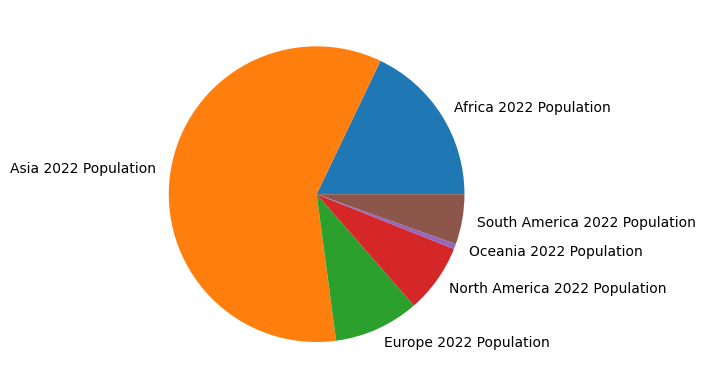

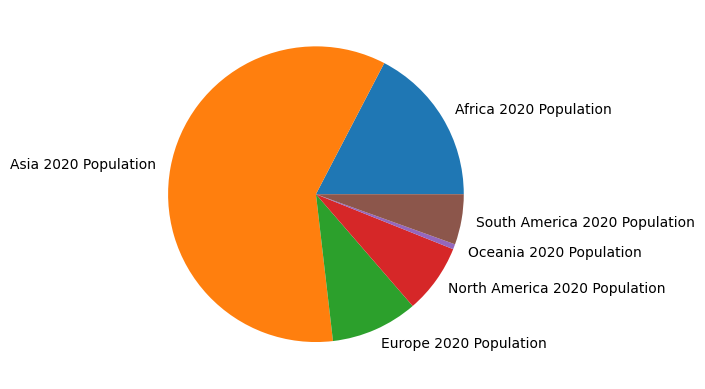

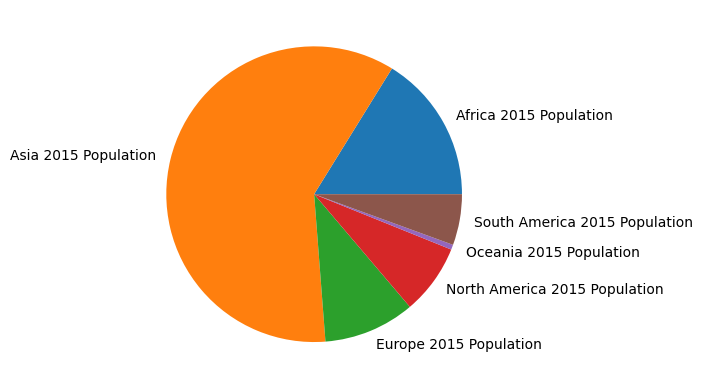

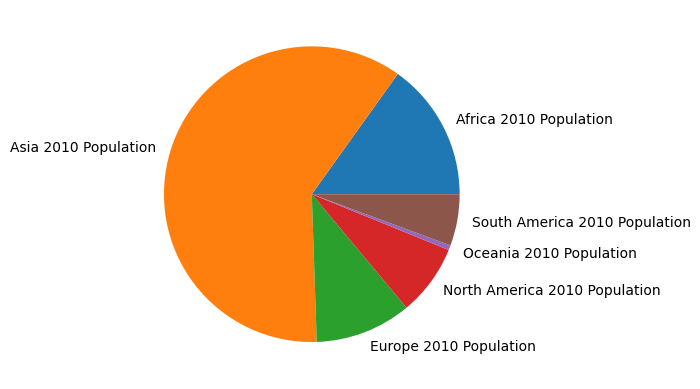

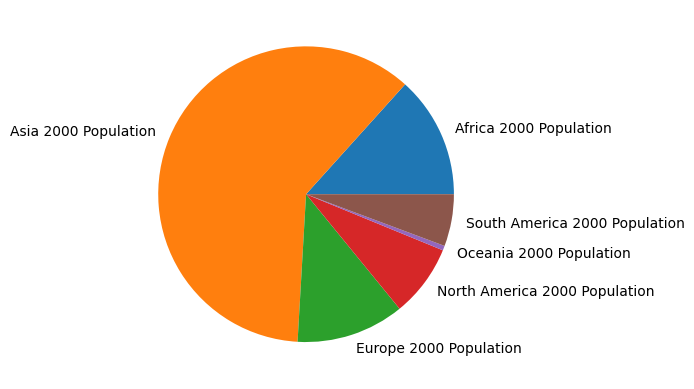

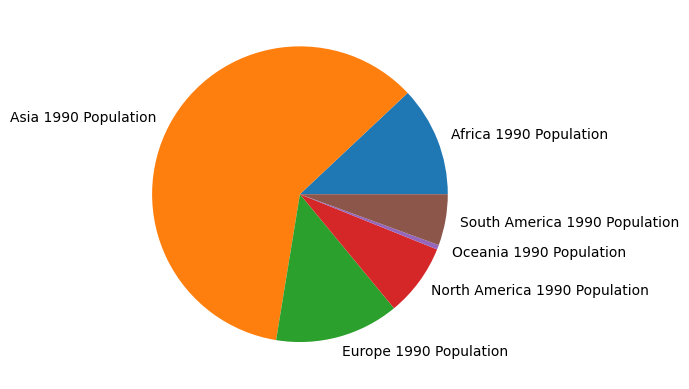

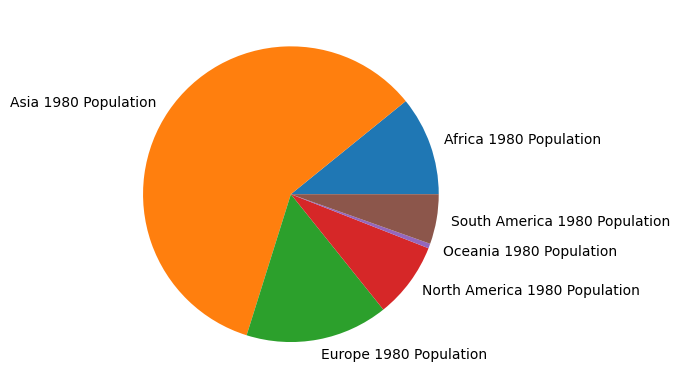

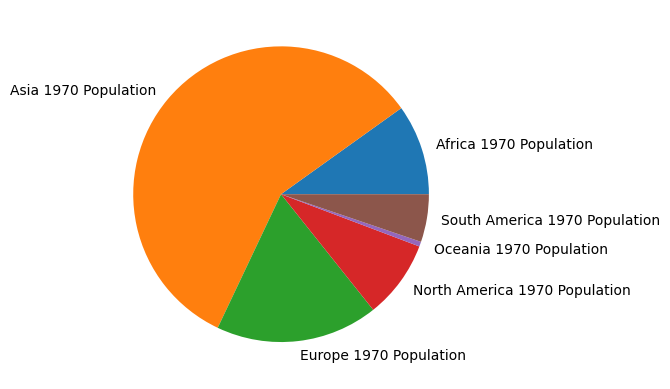

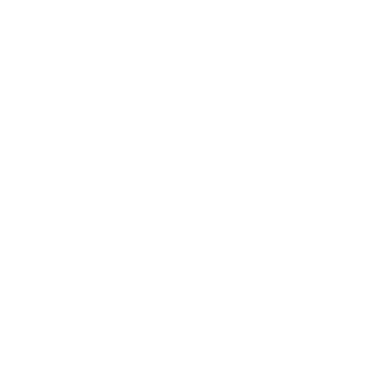

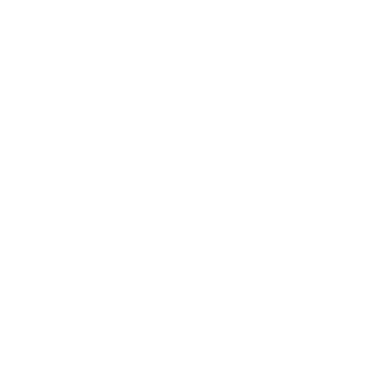

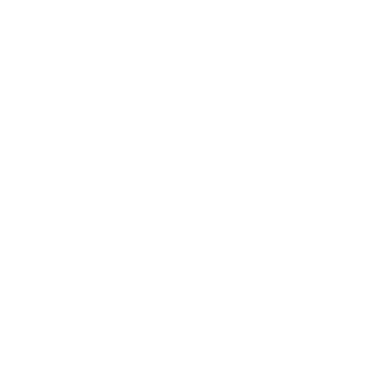

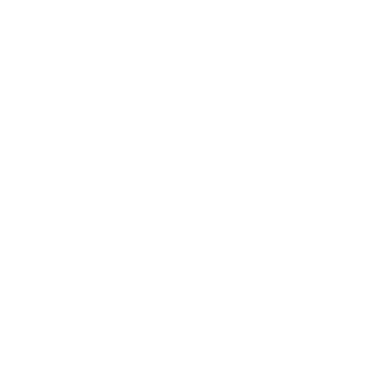

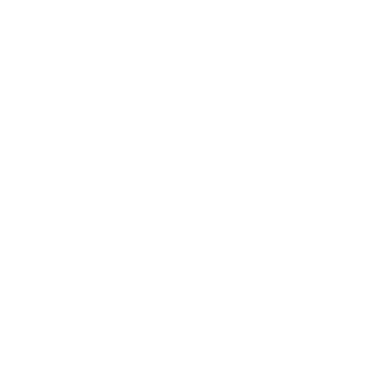

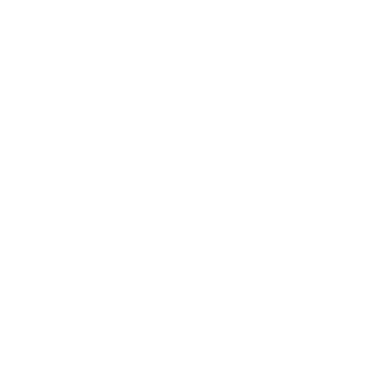

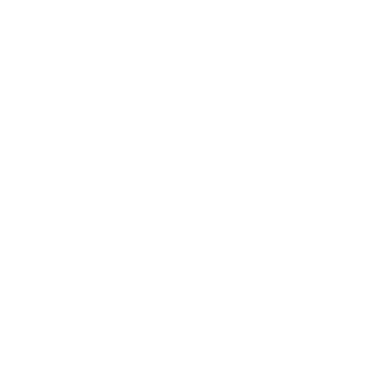

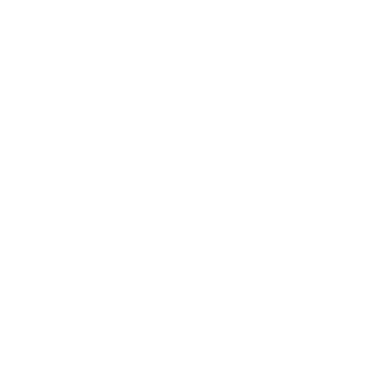

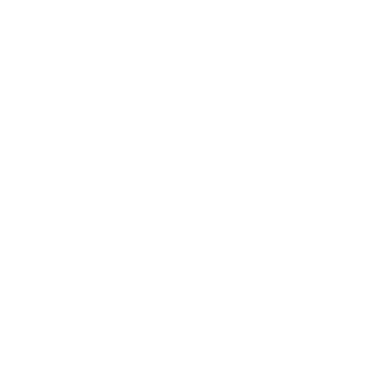

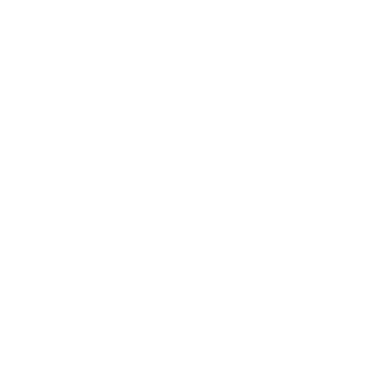

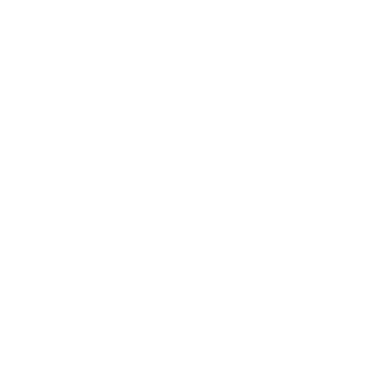

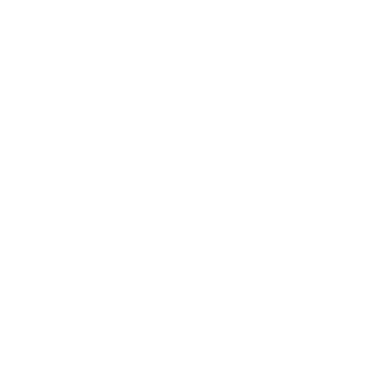

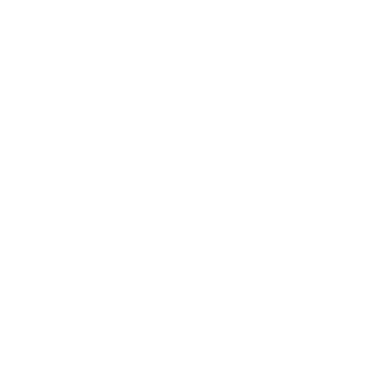

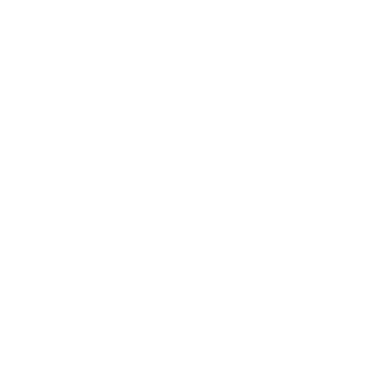

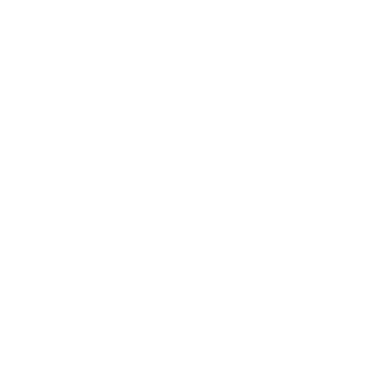

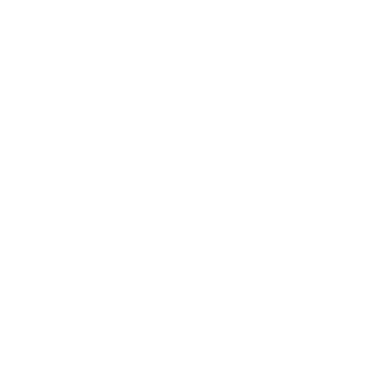

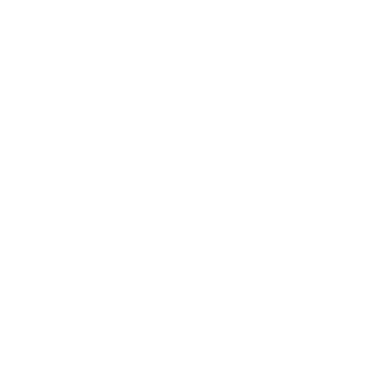

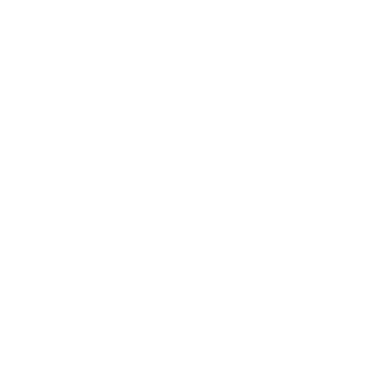

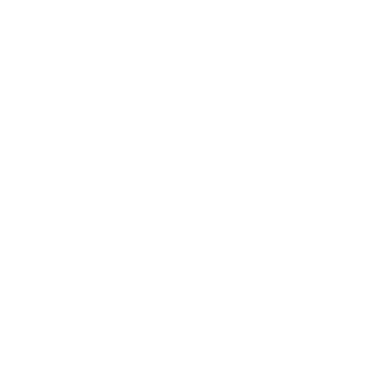

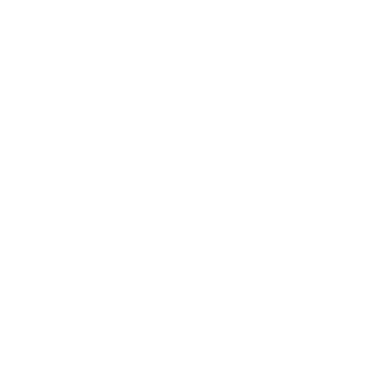

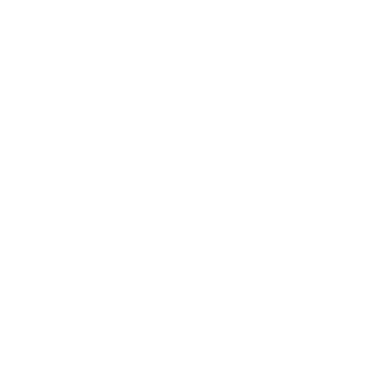

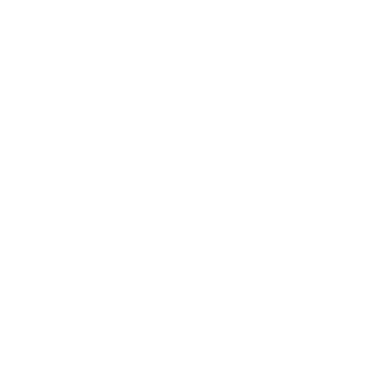

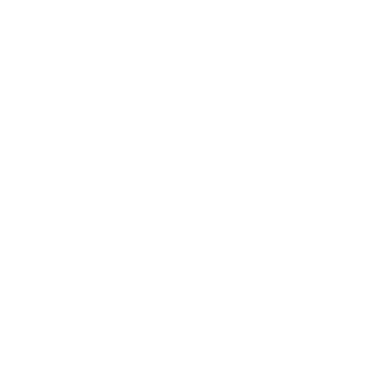

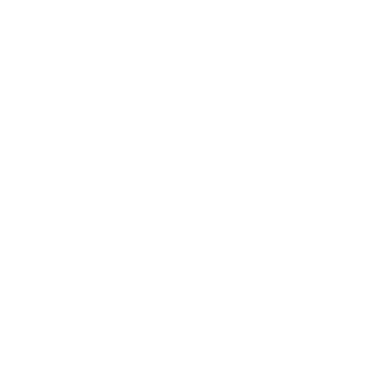

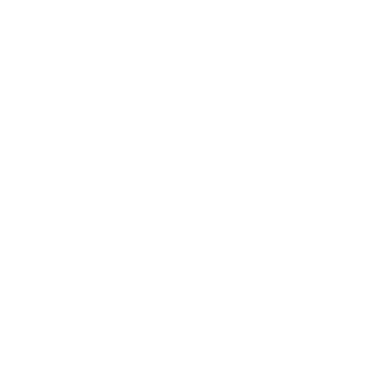

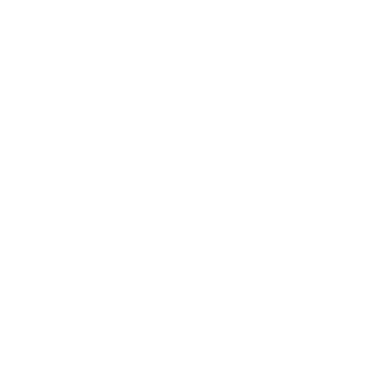

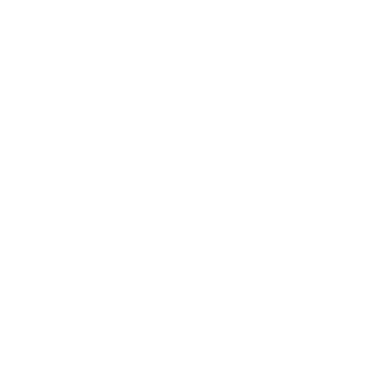

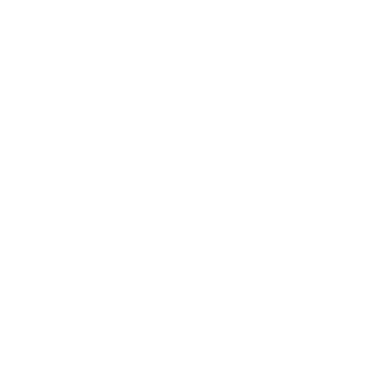

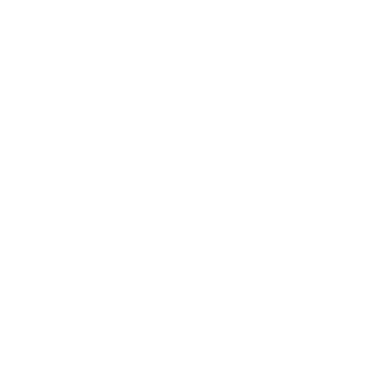

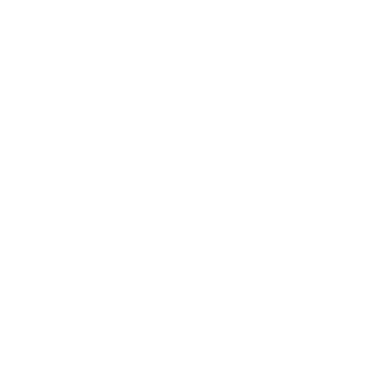

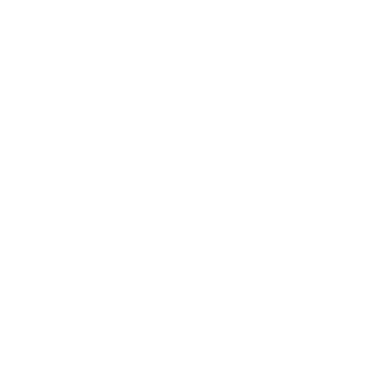

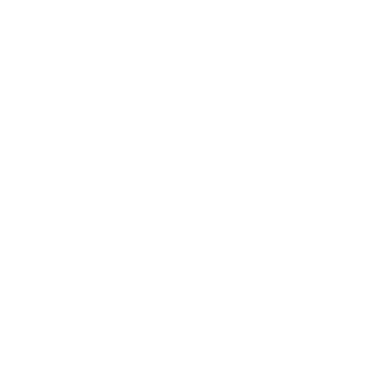

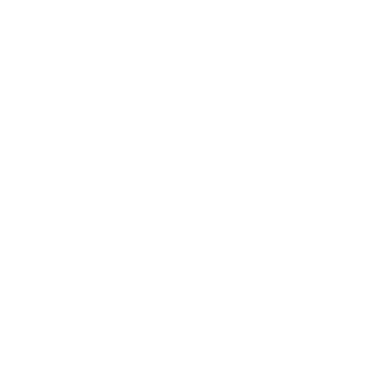

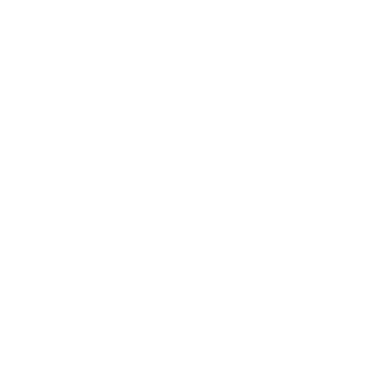

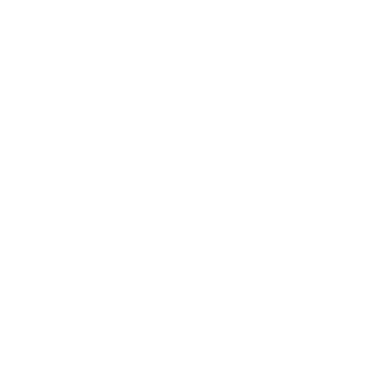

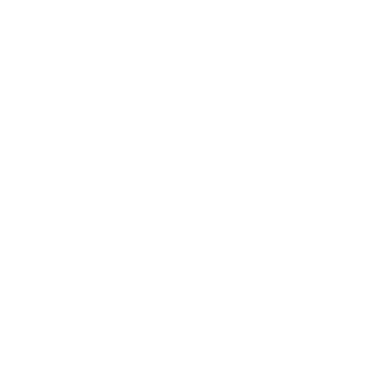

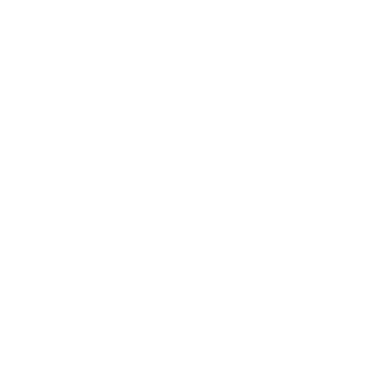

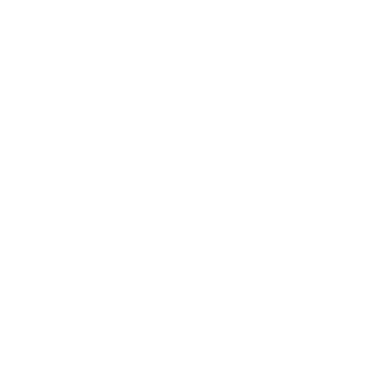

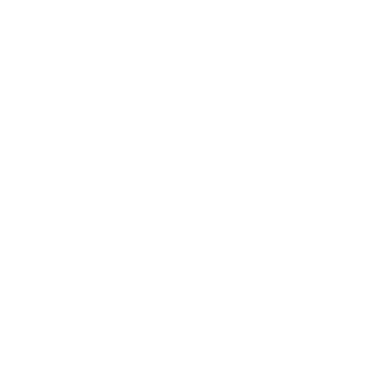

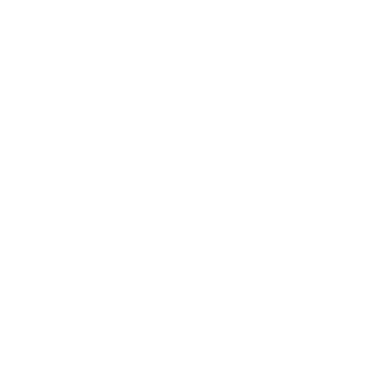

In [12]:
import matplotlib.pyplot as plt
 
# we have continent list its lengths can be used to create different pie charts
for i in range(len (continent_list['population'])):
    i*=len (Continents)
    plt.pie(continent_list['population'][i:len (Continents)+i] ,
    labels=continent_list['continent'][i:len(Continents)+i]+" "+(continent_list['year'][i:len (Continents)+i]))
    plt.show()


    

after this tremandious work we can say that:-1- asia is highest population always and oceans are the lowest 2- more interestingly : africa before 1990 had lower population than europe then Africa started to grow to be more (europe+north america) 3-farther more now europe was at 1980double north america now is almost equal to north America at 2022

However, these findings may be baised  because area of every continent vary 
ex:- may be Africa is larger than euro*3  in that case normally they grow than euro
Therefore,  next step is to draw lines with sharedX  of density to either support the previous 
conclusion or negate it 

IndexError: index 8 is out of bounds for axis 0 with size 8

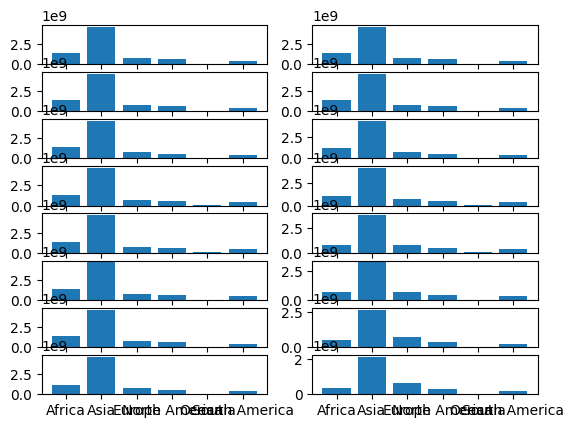

In [52]:
""""
not as expected bar chart  and gathering all in one figure is not useful also 
fig,axs=plt.subplots(8,2, sharex=True)
charts=[0,0,0,1,4,5,6,7]
k=0;
for i in range(len (continent_list['population'])):
    
    #plt.subplot(len(Continents)//2,2,((i//len(Continents))+1)) # to remove the effect of multiplicat
    for j in range(2):
        hei=continent_list['population'][i:len (Continents)+i]
        label=continent_list['continent'][i:len(Continents)+i]
        axs[k,j].bar(label,hei)
        #axs[k,j].set_xticklabels(rotate=90)
       #axs[k,j].set_title(continent_list['year'][i:len (Continents)+i])
        i*=len (Continents)
        #plt.show()
    k+=1
    #charts[i//len (Continents)].set_xticks(rotate=90)
    #
    """

In [ ]:
1-now we know that highest population  over all times is Asia ,lowest is oceans 
2- Africa was 
lets draw lines to observe density change over the time (which continent slowing down, )